In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


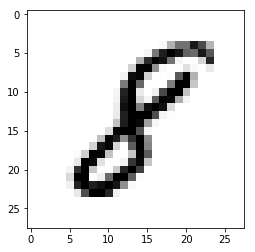

In [4]:

%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train.shape


(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0719 12:57:37.987982 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 12:57:37.998854 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 12:57:38.000852 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 12:57:38.013841 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d

In [13]:
from tensorflow import keras

In [14]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
keras

<module 'tensorflow.python.keras.api._v1.keras' from '/home/student/.local/lib/python3.7/site-packages/tensorflow/python/keras/api/_v1/keras/__init__.py'>

In [16]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [17]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0719 12:57:38.216720 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 12:57:38.235976 139864402769728 deprecation_wrapper.py:119] From /home/student/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0719 12:57:38.309384 139864402769728 deprecation.py:323] From /home/student/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.2097 - acc: 0.9369
Epoch 2/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0887 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0625 - acc: 0.9800
Epoch 4/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0480 - acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0378 - acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0311 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0247 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0252 - acc: 0.9915
Epoch 9/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0207 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 20s 330us/step - loss: 

In [18]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 77us/step


[0.058036441690840726, 0.9855]

In [19]:
from PIL import Image


In [20]:
def converttoarray(path):
    im = Image.open(path)
    imarray = np.array(im)
    imarray = 127 + (128-imarray)
    imarray = imarray.reshape(28, 28, 1)
    imarray = imarray.astype('float32')
    imarray /= 255
    return imarray
imagetest = converttoarray("../../Documents/Untitled.png")

In [21]:
128-255

-127

In [22]:
imagetest = converttoarray("../../Documents/Untitled.png")

In [23]:
import numpy as np

In [24]:
imagetest.shape


(28, 28, 1)

In [25]:
imagetest

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

6


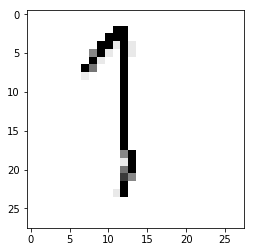

In [31]:
image_index = 4444
plt.imshow(imagetest.reshape(28, 28),cmap='Greys')
pred = model.predict(imagetest.reshape(1, 28, 28, 1))
print(pred.argmax())

In [27]:
def predictimage(path):
    imarray = converttoarray(path)
    plt.imshow(imarray.reshape(28, 28),cmap='Greys')
    pred = model.predict(imarray.reshape(1, 28, 28, 1))
    print(pred.argmax())

0


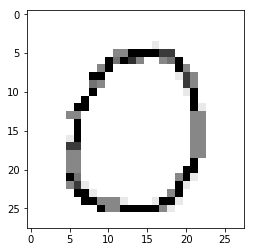

In [39]:
predictimage("../../Documents/Untitled.png")